In [2]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
X, y = datasets.load_digits(return_X_y=True)

In [20]:
clf = DecisionTreeClassifier()
mean_score = cross_val_score(clf, X, y, cv=10).mean()
print(mean_score)
with open("ans1.txt", 'w') as f:
    f.write(str(mean_score))

0.8358832296100311


Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [6]:
from sklearn.ensemble import BaggingClassifier

In [22]:
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)
mean_score = cross_val_score(clf, X, y, cv=10).mean()
print(mean_score)
with open("ans2.txt", 'w') as f:
    f.write(str(mean_score))

0.9232631163808742


Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на d\sqrt{d}d
​ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [1]:
from math import sqrt

In [24]:
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_features=int(sqrt(X.shape[1])))
mean_score = cross_val_score(clf, X, y, cv=10).mean()
print(mean_score)
with open("ans3.txt", 'w') as f:
    f.write(str(mean_score))

0.9393352573126673


Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же d\sqrt{d}d
​ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [7]:
clf = BaggingClassifier(DecisionTreeClassifier(max_features=int(sqrt(X.shape[1]))), n_estimators=100)
mean_score = cross_val_score(clf, X, y, cv=10).mean()
print(mean_score)
with open("ans4.txt", 'w') as f:
    f.write(str(mean_score))

0.9572163113239022


Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. 

In [13]:
from sklearn.ensemble import  RandomForestClassifier 
import matplotlib.pyplot as plt

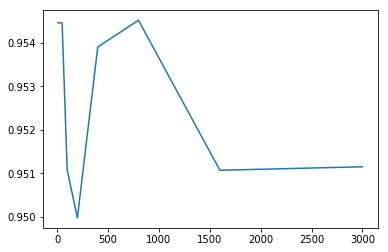

In [16]:

n_estimators = [10, 20, 50, 100, 200, 400, 800, 1600, 3000]
acc = []
for n_est in n_estimators:
    clf = RandomForestClassifier(n_estimators=100, max_features=int(sqrt(X.shape[1])))
    mean_score = cross_val_score(clf, X, y, cv=10).mean()
    acc.append(mean_score)
    
    
plt.plot(n_estimators, acc)
# with open("ans4.txt", 'w') as f:
#     f.write(str(mean_score))

In [18]:
X.shape[1]

64

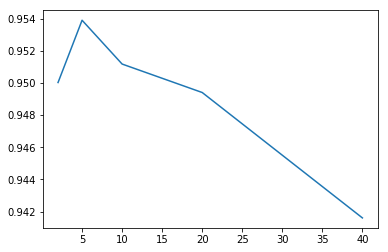

In [20]:

# n_estimators = [10, 20, 50, 100, 200, 400, 800, 1600, 3000]
features_num = [2, 5, 10, 20, 40]
acc = []
for n_f in features_num:
    clf = RandomForestClassifier(n_estimators=100, max_features=n_f)
    mean_score = cross_val_score(clf, X, y, cv=10).mean()
    acc.append(mean_score)
    
    
plt.plot(features_num, acc)
# with open("ans4.txt", 'w') as f:
#     f.write(str(mean_score))

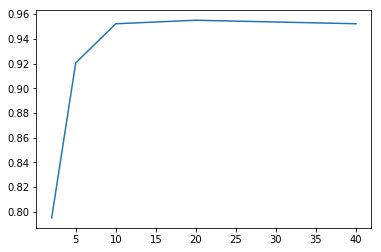

In [22]:
depth = [2, 5, 10, 20, 40]
acc = []
for d in depth:
    clf = RandomForestClassifier(n_estimators=100, max_features=int(sqrt(X.shape[1])), max_depth=d)
    mean_score = cross_val_score(clf, X, y, cv=10).mean()
    acc.append(mean_score)
    
    
plt.plot(depth, acc)

In [26]:
with open("ans5.txt", 'w') as f:
    f.write(" ".join([str(i) for i in [2, 3, 4, 7]]))

In [12]:
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()